# Домашнее задание "Случайные величины и вероятности".

## Уровень 0:


### Задание 1

В магазин привезли устройства с 3-х разных предприятий. 

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. 

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [16]:
res = 0.2*0.1 + 0.3*0.05 + 0.5*0.2
print(f'Вероятность того, что случайно купленная новая продукция окажется высшего сорта составляет {res*100}%.')

Вероятность того, что случайно купленная новая продукция окажется высшего сорта составляет 13.5%.


### Задание 2


Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

In [1]:
import itertools

In [2]:
outcomes = list(itertools.product(['H', 'T'], repeat=3))

In [3]:
def event_occurs(event, outcomes):
    count = 0
    for outcome in outcomes:
        if event(outcome):
            count += 1
    return count

In [4]:
# определяем события A1, A2, A3
A1 = lambda outcome: outcome[0] == outcome[1]
A2 = lambda outcome: outcome[1] == outcome[2]
A3 = lambda outcome: outcome[0] == outcome[2]

In [5]:
# находим вероятности каждого события
P_A1 = event_occurs(A1, outcomes) / len(outcomes)
P_A2 = event_occurs(A2, outcomes) / len(outcomes)
P_A3 = event_occurs(A3, outcomes) / len(outcomes)

In [6]:
# находим вероятности пересечений
P_A1_A2 = event_occurs(lambda outcome: A1(outcome) and A2(outcome), outcomes) / len(outcomes)
P_A1_A3 = event_occurs(lambda outcome: A1(outcome) and A3(outcome), outcomes) / len(outcomes)
P_A2_A3 = event_occurs(lambda outcome: A2(outcome) and A3(outcome), outcomes) / len(outcomes)

In [7]:
# находим вероятность пересечения всех трех событий
P_A1_A2_A3 = event_occurs(lambda outcome: A1(outcome) and A2(outcome) and A3(outcome), outcomes) / len(outcomes)

In [8]:
print("P(A1) = ", P_A1)
print("P(A2) = ", P_A2)
print("P(A3) = ", P_A3)
print("P(A1 ∩ A2) = ", P_A1_A2)
print("P(A1 ∩ A3) = ", P_A1_A3)
print("P(A2 ∩ A3) = ", P_A2_A3)
print("P(A1 ∩ A2 ∩ A3) = ", P_A1_A2_A3)

P(A1) =  0.5
P(A2) =  0.5
P(A3) =  0.5
P(A1 ∩ A2) =  0.25
P(A1 ∩ A3) =  0.25
P(A2 ∩ A3) =  0.25
P(A1 ∩ A2 ∩ A3) =  0.25


In [10]:
# проверяем независимость попарно
print("P(A1 ∩ A2) = ", P_A1_A2, " = P(A1) * P(A2) = ", P_A1, "*", P_A2)
print("P(A1 ∩ A3) = ", P_A1_A3, " = P(A1) * P(A3) = ", P_A1, "*", P_A3)
print("P(A2 ∩ A3) = ", P_A2_A3, " = P(A2) * P(A3) = ", P_A2, "*", P_A3)

P(A1 ∩ A2) =  0.25  = P(A1) * P(A2) =  0.5 * 0.5
P(A1 ∩ A3) =  0.25  = P(A1) * P(A3) =  0.5 * 0.5
P(A2 ∩ A3) =  0.25  = P(A2) * P(A3) =  0.5 * 0.5


In [14]:
# проверяем независимость в совокупности
print("P(A1 ∩ A2 ∩ A3) =", P_A1_A2_A3, "!= P(A1) * P(A2) * P(A3) =", P_A1, "*", P_A2, "*", P_A3, "=", P_A1*P_A2*P_A3)

P(A1 ∩ A2 ∩ A3) = 0.25 != P(A1) * P(A2) * P(A3) = 0.5 * 0.5 * 0.5 = 0.125


## Уровень 1:

### Задание 3


Изучите 3 распределения из библиотеки scipy: [Нормальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), [Экспоненциальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html), [Стьюдента](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). Используя функцию плотности распредления (`pdf`), постройте пять графиков плотностей для каждого распределения при разных параметрах. Запишите ваши наблюдения: как и на что влияют параметры у каждого распределения. 

Дополнительная информация [тут](https://pythonguides.com/scipy-stats/).

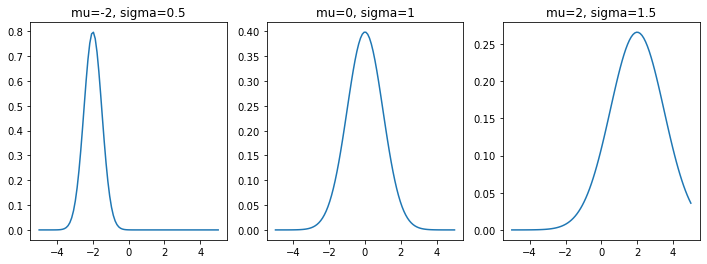

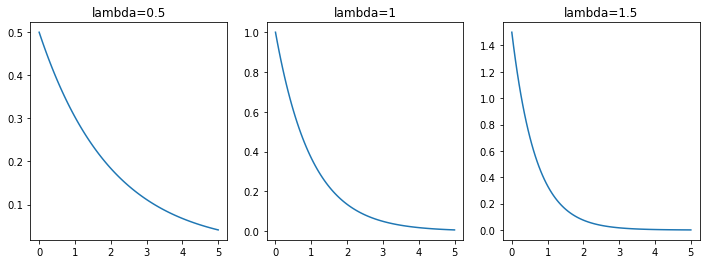

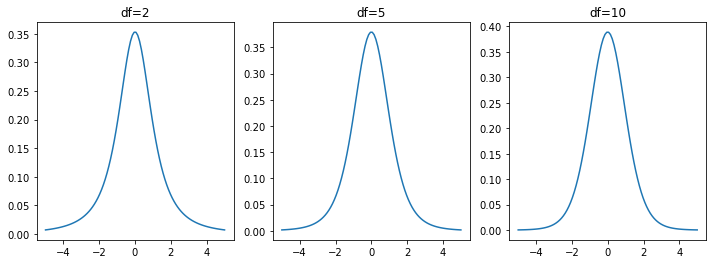

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, t

# Нормальное распределение
x = np.linspace(-5, 5, num=100)
mu_values = [-2, 0, 2]
sigma_values = [0.5, 1, 1.5]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axs[i].plot(x, norm.pdf(x, loc=mu_values[i], scale=sigma_values[i]))
    axs[i].set_title(f"mu={mu_values[i]}, sigma={sigma_values[i]}")

# Экспоненциальное распределение
x = np.linspace(0, 5, num=100)
lam_values = [0.5, 1, 1.5]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axs[i].plot(x, expon.pdf(x, scale=1/lam_values[i]))
    axs[i].set_title(f"lambda={lam_values[i]}")

# Распределение Стьюдента
x = np.linspace(-5, 5, num=100)
df_values = [2, 5, 10]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axs[i].plot(x, t.pdf(x, df=df_values[i]))
    axs[i].set_title(f"df={df_values[i]}")

plt.show()

**Нормальное распределение:** параметр mu определяет среднее значение, а sigma - стандартное отклонение. При увеличении mu график смещается вправо, а при увеличении sigma распределение становится более широким и пологим.

**Экспоненциальное распределение:** параметр lambda определяет скорость затухания экспоненты. При увеличении lambda график становится более вертикальным и имеет более быстрое затухание.

**Распределение Стьюдента:** параметр df определяет число степеней свободы. При увеличении df распределение становится более узким и имеет более тяжелые хвосты.